In [1]:
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

import tensorflow as tf

In [2]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 2.0.0
Default GPU Device: /device:GPU:0


In [3]:
def extract_feature(file_name):
    
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        stft=np.abs(librosa.stft(audio))
        mfccs=np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=21).T,axis=0)
        chroma_stft=np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(audio, sr=sample_rate).T,axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sample_rate).T,axis=0)
        
   # except Exception as e:
    #    print("Error encountered while parsing file: ", file)
     #   return None
    
        return mfccs,chroma_stft,mel,contrast,tonnetz

In [4]:
start_time= timer()
mfccs,chroma,mel,contrast,tonnetz= extract_feature('E:/Dataset/UrbanSound8K/audio/fold3/6988-5-0-4.wav')
end_time=timer()
print('time to extract features from one file: {:.3f}sec'.format((end_time-start_time)/60))

C:\Users\Admin\Anaconda3\envs\gputest\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


time to extract features from one file: 0.011sec


In [14]:
metadata=pd.read_csv('E:/Dataset/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata_ori=pd.read_csv('E:/Dataset/UrbanSound8K/Augmented_metadata/UrbanSound8k_Augmented.csv')


In [6]:
print(mfccs.shape,chroma.shape,mel.shape,contrast.shape,tonnetz.shape)

(21,) (12,) (128,) (7,) (6,)


In [7]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [12]:
Augment_list= ['pitch_2', 'pitch_-2','pitch_time290','pitch_time-290','pitch_time2110','pitch_time-2110','speed_90','speed_110']



In [16]:
stacked_features = []
exceptions=0
count=0

start_time = timer()
for i in range(10):
    for j in range(8):
  
        mypath = 'E:/Dataset/UrbanSound8K/Augmented_audio/'+ fold_list[i] + '/' + Augment_list[j] + '/'
        files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]

        for fn in files:
            try: 
                mfccs,chroma,mel,contrast,tonnetz = extract_feature(fn)
                features = np.empty((0,174))
                ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
                features = np.reshape(np.vstack([features,ext_features]),(29,6))
                count +=1
                if(count%500==0):
                    print(count)


            except: 
                print(fn)
                exceptions += 1
                continue

            l_row = metadata_ori.loc[metadata_ori['file']==fn.split('/')[-1]].values.tolist()
            label = l_row[0][-4]
            fold = i+1
            

            stacked_features.append([features, features.shape, label, fold])

            
for i in range(10):
    
    mypath = 'E:/Dataset/UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try:
            mfccs,chroma,mel,contrast,tonnetz = extract_feature(fn)
            features = np.empty((0,174))
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.reshape(np.vstack([features,ext_features]),(29,6))
            
        except: 
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata.loc[metadata['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_2/.DS_Store


C:\Users\Admin\Anaconda3\envs\gputest\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


500


C:\Users\Admin\Anaconda3\envs\gputest\lib\site-packages\librosa\util\utils.py:1591: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
C:\Users\Admin\Anaconda3\envs\gputest\lib\site-packages\librosa\util\utils.py:1604: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_2/87275-1-1-0.wav
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_2/87275-1-3-0.wav
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_2/87275-1-4-0.wav
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_-2/.DS_Store
1000
1500
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_-2/87275-1-2-0.wav
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_-2/87275-1-3-0.wav
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_-2/87275-1-4-0.wav
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time290/.DS_Store
2000
2500
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time290/87275-1-1-0.wav
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time290/87275-1-2-0.wav
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time290/87275-1-3-0.wav
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time-290/.DS_Store
3000
E:/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time-290/87275-1-1-0.wav
E:/Dataset/UrbanSound8K/Augmented_audio/f

E:/Dataset/UrbanSound8K/audio/fold9/.DS_Store
E:/Dataset/UrbanSound8K/audio/fold10/.DS_Store
Exceptions:  113
time taken: 291.0 minutes 22.4 seconds
None
Finished feature extraction from all folder


In [17]:
cols=['Stacked_Features', 'Matrix_Shape', 'Label', 'Fold']
Stacked_feature_pd=pd.DataFrame(data=stacked_features , columns=cols)
Stacked_feature_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78565 entries, 0 to 78564
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Stacked_Features  78565 non-null  object
 1   Matrix_Shape      78565 non-null  object
 2   Label             78565 non-null  object
 3   Fold              78565 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


In [34]:
Stacked_feature_pd.head()

,Stacked_Features,Matrix_Shape,Label,Fold
0,"[[-428.4471130371094, 98.53794860839844, 10.22...","(29, 6)",dog_bark,1
1,"[[-383.4932861328125, 132.21249389648438, 17.8...","(29, 6)",dog_bark,1
2,"[[-462.9029846191406, 78.42694854736328, 6.544...","(29, 6)",dog_bark,1
3,"[[-282.76763916015625, 93.10582733154297, -51....","(29, 6)",dog_bark,1
4,"[[-409.9855041503906, 125.34252166748047, 28.1...","(29, 6)",gun_shot,1


In [36]:


from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


X = np.array(Stacked_feature_pd.Stacked_Features.tolist())
y = np.array(Stacked_feature_pd.Label.tolist())


le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [37]:


from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state=42)



In [38]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, yy.shape)

(62852, 29, 6) (15713, 29, 6) (62852, 10) (15713, 10) (78565, 10)


In [44]:
x_train=np.reshape(x_train,(x_train.shape[0], 29,6,1))
x_test=np.reshape(x_test,(x_test.shape[0], 29,6,1))
print(x_train.shape, x_test.shape)



(62852, 29, 6, 1) (15713, 29, 6, 1)


In [45]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

In [46]:


model=Sequential()
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(29,6,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())
#model.add(GlobalAveragePooling2D())


model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))



In [47]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 29, 6, 64)         1664      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 3, 64)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 2, 128)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 8, 2, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)              

In [48]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 29, 6, 64)         1664      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 3, 64)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 2, 128)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 8, 2, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)              

In [49]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Pre-training accuracy: 11.4237%


In [50]:
start_time=timer()
history=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))
end_time=timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))

Train on 62852 samples, validate on 15713 samples
Epoch 1/30
62852/62852 [==============================] - 6s 98us/step - loss: 1.5087 - accuracy: 0.4767 - val_loss: 0.9589 - val_accuracy: 0.6819
Epoch 2/30
62852/62852 [==============================] - 6s 93us/step - loss: 1.0301 - accuracy: 0.6538 - val_loss: 0.7111 - val_accuracy: 0.7599
Epoch 3/30
62852/62852 [==============================] - 6s 93us/step - loss: 0.8505 - accuracy: 0.7183 - val_loss: 0.5789 - val_accuracy: 0.8051
Epoch 4/30
62852/62852 [==============================] - 6s 91us/step - loss: 0.7207 - accuracy: 0.7612 - val_loss: 0.4802 - val_accuracy: 0.8315
Epoch 5/30
62852/62852 [==============================] - 6s 93us/step - loss: 0.6491 - accuracy: 0.7841 - val_loss: 0.4226 - val_accuracy: 0.8608
Epoch 6/30
62852/62852 [==============================] - 6s 92us/step - loss: 0.5930 - accuracy: 0.8033 - val_loss: 0.3991 - val_accuracy: 0.8659
Epoch 7/30
62852/62852 [==============================] - 6s 94us/st

In [51]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1]*100)

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1]*100)

Training Accuracy:  97.05657958984375
Testing Accuracy:  95.69146633148193


In [52]:
def plot_accuracy():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('No of epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def plot_loss():
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Testing')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('No of epoch')
    plt.legend(loc="upper left")
    plt.show()

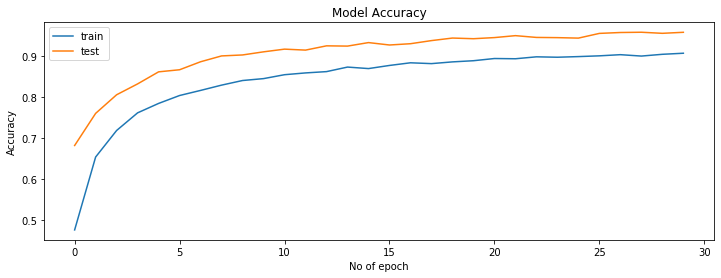

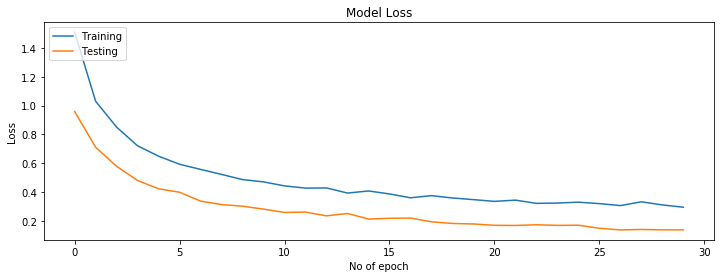

In [53]:
plt.figure(figsize=(12,4))
plot_accuracy()
plt.figure(figsize=(12,4))
plot_loss()

In [54]:
Class_Label = {'Air_conditioner':0, 'Car_horn':1, 'Children_playing':2, 'Dog_Bark':3, 
               'Drilling':4,'Engine_idling':5, 'Gun_Shot' :6, 'Jackhammer': 7 ,'Siren':8,'Street_Music':9 }

In [55]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis = 1)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9]
target_names = Class_Label.keys()

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(15713,) (15713,)
                  precision    recall  f1-score   support

 Air_conditioner       0.97      0.97      0.97      1782
        Car_horn       0.98      0.96      0.97       775
Children_playing       0.92      0.93      0.93      1770
        Dog_Bark       0.98      0.91      0.95      1839
        Drilling       0.97      0.94      0.95      1763
   Engine_idling       0.97      0.98      0.98      1806
        Gun_Shot       1.00      0.97      0.98       709
      Jackhammer       0.94      0.98      0.96      1781
           Siren       0.99      0.97      0.98      1693
    Street_Music       0.89      0.96      0.93      1795

        accuracy                           0.96     15713
       macro avg       0.96      0.96      0.96     15713
    weighted avg       0.96      0.96      0.96     15713



In [56]:
from sklearn.metrics import accuracy_score
z=np.around((accuracy_score(y_true, y_pred)*100), decimals=0)
print(z)

96.0


In [57]:


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))



[[1732    0   14    1    3   12    0    7    2   11]
 [   4  742    1    0    2    4    0    1    2   19]
 [   6    4 1650   15    1    6    0    2    6   80]
 [  18    2   67 1681    7   13    0    3   10   38]
 [   2    1    9    1 1655    0    0   75    0   20]
 [   8    2    9    0    6 1770    0    0    1   10]
 [   0    0    2    9    7    0  687    1    0    3]
 [   0    0    2    1   24    1    2 1747    0    4]
 [   2    2    7    8    0    8    0    2 1644   20]
 [   6    8   28    2    1    3    0   19    0 1728]]


Text(32.09374999999999, 0.5, 'Predicted label')

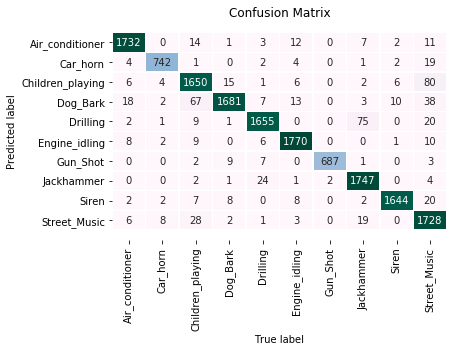

<Figure size 720x288 with 0 Axes>

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax=plt.subplot()
mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,4))
sns.heatmap(mat, square=False, annot=True, fmt='d',cbar=False,linewidths=.5,xticklabels=Class_Label.keys(),yticklabels=Class_Label.keys(), ax=ax, cmap='PuBuGn')
bottom, top= ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top -0.5)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

In [59]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [60]:
accuracies=acc_per_class(mat)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

,CLASS,ACCURACY
7,Jackhammer,98.090960
5,Engine Idling,98.006645
0,Air Conditioner,97.194164
8,Siren,97.105729
6,Gun Shot,96.897038
9,Street Music,96.267409
1,Car Horn,95.741935
4,Drilling,93.874078
2,Children Playing,93.220339
3,Dog bark,91.408374


Text(0.5, 1.0, 'Accuracy per Class')

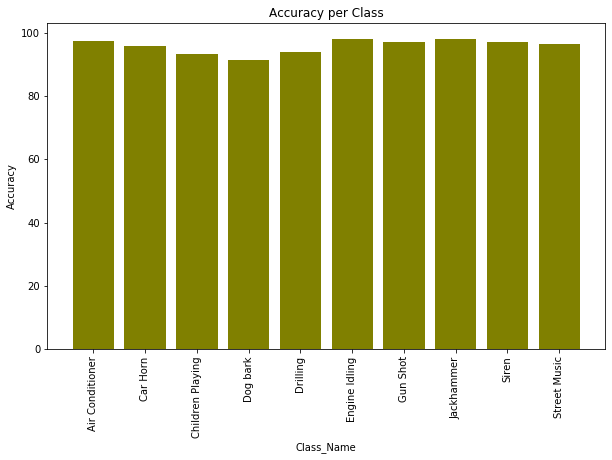

In [61]:
Y=np.around(accuracies , decimals=1)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]
index=np.arange(len(labels))
plt.figure(figsize=(10,6))
plt.bar(index, Y, color='olive')
plt.xticks(index, labels, rotation=90)
plt.xlabel('Class_Name')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')